<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/fitbitbenzeriverilerinanalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Adım 3: Sahte Veri Oluşturalım
Örnek 1: Basit Rastgele Adım Verisi

In [2]:
# 30 günlük tarih aralığı oluştur
dates = pd.date_range(start="2024-01-01", end="2024-01-30", freq='D')

# Rastgele adım sayıları (3000 ile 15000 arası)
steps = np.random.randint(3000, 15000, size=len(dates))

# DataFrame oluştur
df = pd.DataFrame({"Tarih": dates, "Adım": steps})

Örnek 2: Daha Gerçekçi Veri (Hafta Sonu Düşüşü ile)



In [3]:
# Hafta içi ve hafta sonu ayrımı
steps = []
for date in dates:
    if date.weekday() < 5:  # Hafta içi (0-4: Pazartesi-Cuma)
        steps.append(np.random.randint(5000, 12000))
    else:  # Hafta sonu (Cumartesi-Pazar)
        steps.append(np.random.randint(2000, 8000))

df = pd.DataFrame({"Tarih": dates, "Adım": steps})

Adım 4: Veriyi İnceleyelim


In [4]:
# İlk 5 satır
print(df.head())

# Temel istatistikler
print(df.describe())

# Eksik veri kontrolü
print("Eksik veri var mı?", df.isnull().sum())

       Tarih  Adım
0 2024-01-01  9810
1 2024-01-02  9826
2 2024-01-03  9789
3 2024-01-04  9695
4 2024-01-05  6244
                     Tarih          Adım
count                   30     30.000000
mean   2024-01-15 12:00:00   7980.100000
min    2024-01-01 00:00:00   2358.000000
25%    2024-01-08 06:00:00   6273.250000
50%    2024-01-15 12:00:00   7564.500000
75%    2024-01-22 18:00:00   9822.000000
max    2024-01-30 00:00:00  11733.000000
std                    NaN   2538.059011
Eksik veri var mı? Tarih    0
Adım     0
dtype: int64


Adım 5: Görselleştirme
A. Zaman Serisi Grafiği

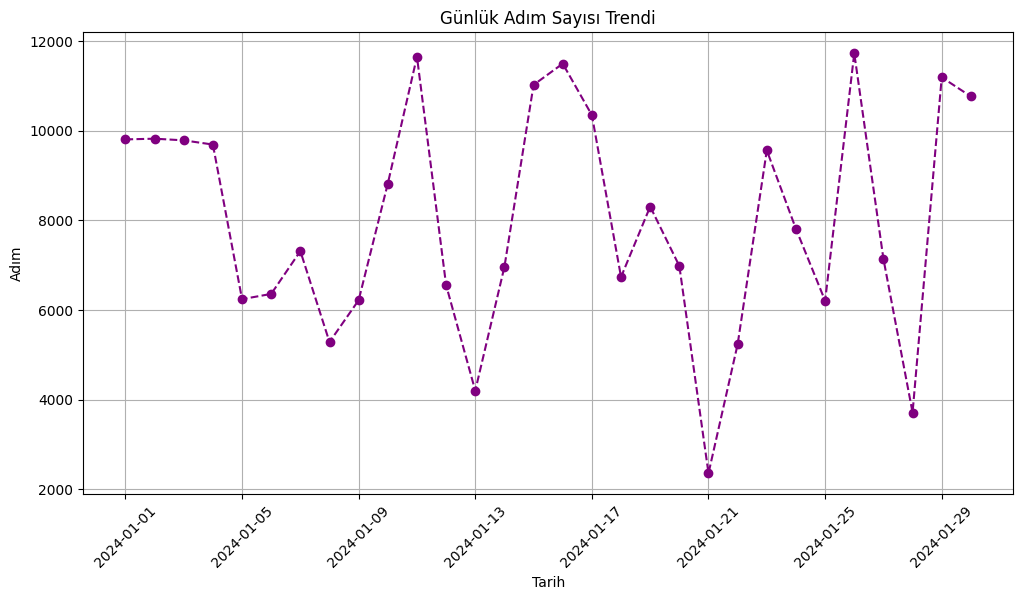

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Tarih'], df['Adım'], marker='o', color='purple', linestyle='--')
plt.title("Günlük Adım Sayısı Trendi")
plt.xlabel("Tarih")
plt.ylabel("Adım")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

B. Haftalık Ortalama Adımlar


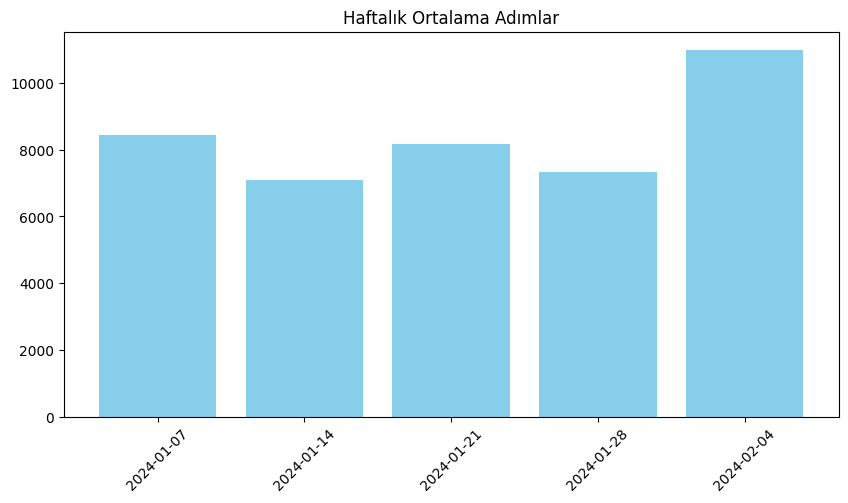

In [6]:
# Haftalık gruplama
df_haftalik = df.resample('W', on='Tarih').mean()

plt.figure(figsize=(10, 5))
plt.bar(df_haftalik.index.strftime('%Y-%m-%d'), df_haftalik['Adım'], color='skyblue')
plt.title("Haftalık Ortalama Adımlar")
plt.xticks(rotation=45)
plt.show()

B. Haftalık Ortalama Adımlar


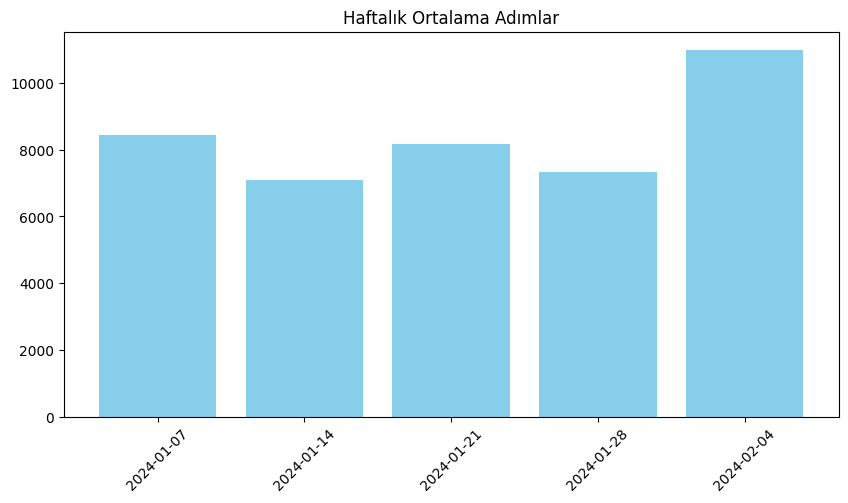

In [7]:
# Haftalık gruplama
df_haftalik = df.resample('W', on='Tarih').mean()

plt.figure(figsize=(10, 5))
plt.bar(df_haftalik.index.strftime('%Y-%m-%d'), df_haftalik['Adım'], color='skyblue')
plt.title("Haftalık Ortalama Adımlar")
plt.xticks(rotation=45)
plt.show()

C. Adım Dağılımı (Boxplot)


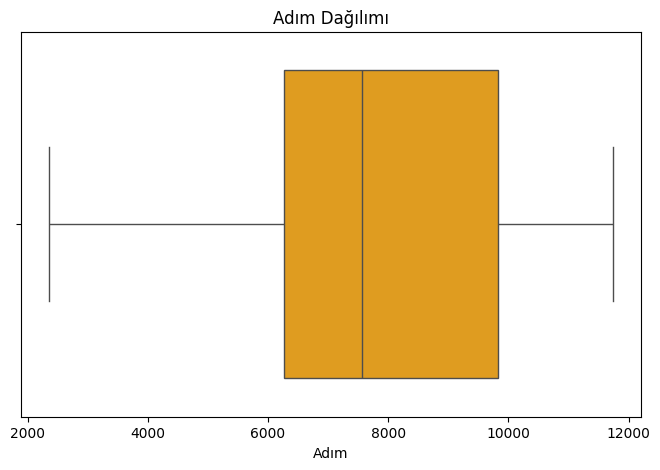

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Adım'], color='orange')
plt.title("Adım Dağılımı")
plt.show()

Adım 6: İleri Analiz
A. Hedef Kontrolü

In [9]:
hedef = 8000
df['Hedefi_Geçti'] = df['Adım'] >= hedef
print(f"Hedefi geçen gün sayısı: {df['Hedefi_Geçti'].sum()}")

Hedefi geçen gün sayısı: 14


B. Hareket Kategorileri


<ipython-input-10-3d40fc9ef6d8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kategori', palette='viridis')


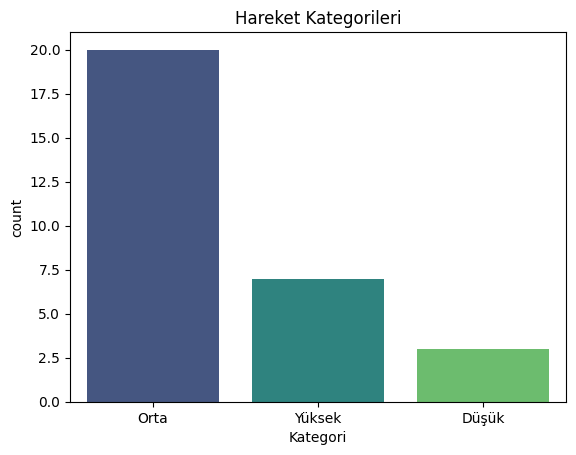

In [10]:
def hareket_kategori(adim):
    if adim < 5000:
        return "Düşük"
    elif 5000 <= adim < 10000:
        return "Orta"
    else:
        return "Yüksek"

df['Kategori'] = df['Adım'].apply(hareket_kategori)

# Kategori dağılımı
sns.countplot(data=df, x='Kategori', palette='viridis')
plt.title("Hareket Kategorileri")
plt.show()

Adım 7: Sonuçları Kaydetme


In [11]:
# DataFrame'i CSV olarak kaydet
df.to_csv('adim_verisi.csv', index=False)

# Grafikleri kaydet
plt.savefig('adim_trendi.png')

<Figure size 640x480 with 0 Axes>

Adım 1: Veriyi ve Kütüphaneleri Yükleme


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Örnek veri oluşturma (hafta sonu düşüşlü)
dates = pd.date_range(start="2024-01-01", end="2024-02-28", freq='D')  # 2 aylık veri
steps = []
for date in dates:
    if date.weekday() < 5:  # Hafta içi
        steps.append(np.random.randint(6000, 12000))
    else:  # Hafta sonu
        steps.append(np.random.randint(2000, 8000))

df = pd.DataFrame({"Tarih": dates, "Adım": steps})
df['Haftanin_Gunu'] = df['Tarih'].dt.day_name()  # Haftanın gününü ekle

Analiz 1: Hafta İçi vs Hafta Sonu Karşılaştırması


Haftalık Ortalamalar:
                  Adım                     
                  mean  median          std
Tarih                                      
Hafta Sonu  5380.50000  5283.5  1539.569420
Hafta İçi   8551.44186  8514.0  1926.054273


<ipython-input-13-b1aaa1972607>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


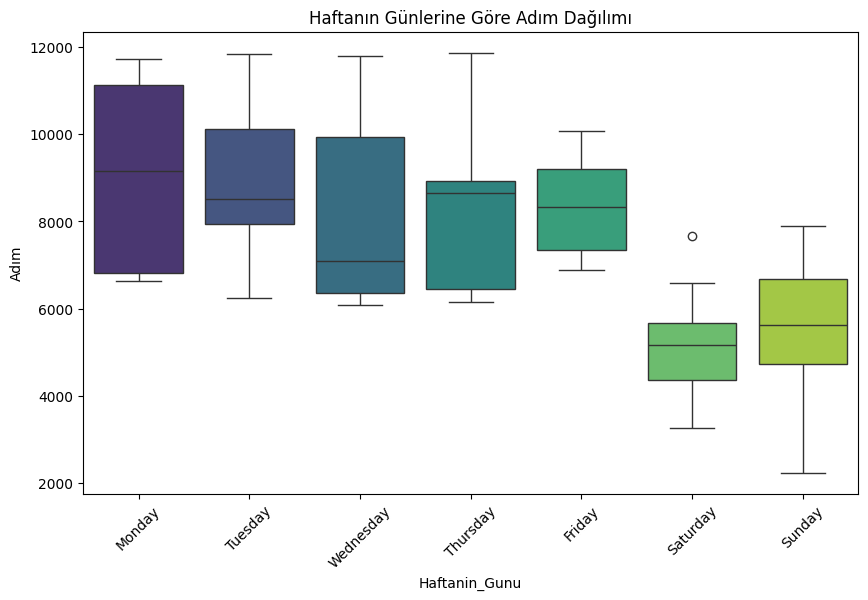

In [13]:
# Hafta içi ve hafta sonu gruplama
haftalik_gruplar = df.groupby(df['Tarih'].dt.dayofweek < 5).agg({
    'Adım': ['mean', 'median', 'std']
}).rename(index={True: 'Hafta İçi', False: 'Hafta Sonu'})

print("Haftalık Ortalamalar:")
print(haftalik_gruplar)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Haftanin_Gunu',
    y='Adım',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    palette='viridis'
)
plt.title("Haftanın Günlerine Göre Adım Dağılımı")
plt.xticks(rotation=45)
plt.show()

Analiz 2: Hareketli Günlerin Yüzdesi


Hareketli gün yüzdesi (8000+ adım): %40.7


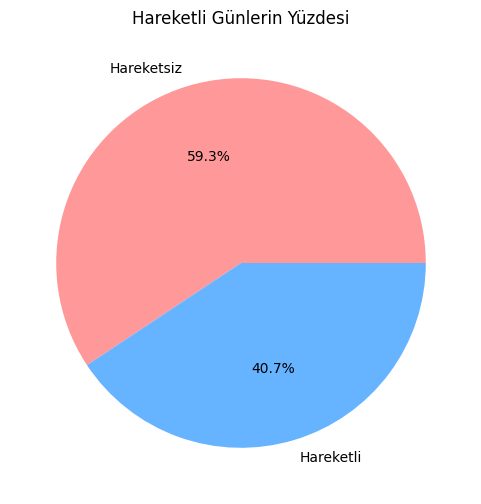

In [14]:
# Hareketli gün eşiği (örneğin 8000 adım)
hareket_esigi = 8000
df['Hareketli'] = df['Adım'] >= hareket_esigi

# Yüzde hesaplama
hareketli_yuzde = df['Hareketli'].mean() * 100
print(f"Hareketli gün yüzdesi ({hareket_esigi}+ adım): %{hareketli_yuzde:.1f}")

# Kategori dağılımı
plt.figure(figsize=(6, 6))
plt.pie(
    df['Hareketli'].value_counts(),
    labels=['Hareketsiz', 'Hareketli'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff']
)
plt.title("Hareketli Günlerin Yüzdesi")
plt.show()

Analiz 3: Trend Analizi (Lineer Regresyon)


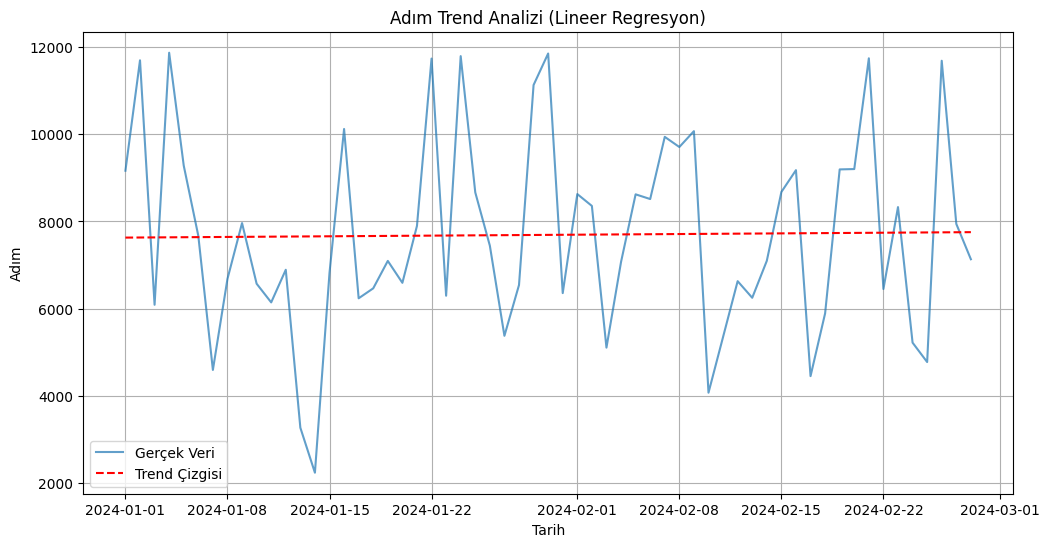

Trend Eğimi: 2.15 (Pozitif eğim = Artan trend)


In [15]:
# Tarihi numerik değere çevirme (gün sayısı)
df['Gun_No'] = (df['Tarih'] - df['Tarih'].min()).dt.days

# Lineer regresyon modeli
X = df[['Gun_No']]
y = df['Adım']
model = LinearRegression().fit(X, y)
trend = model.predict(X)

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(df['Tarih'], df['Adım'], label='Gerçek Veri', alpha=0.7)
plt.plot(df['Tarih'], trend, color='red', linestyle='--', label='Trend Çizgisi')
plt.title("Adım Trend Analizi (Lineer Regresyon)")
plt.xlabel("Tarih")
plt.ylabel("Adım")
plt.legend()
plt.grid(True)
plt.show()

print(f"Trend Eğimi: {model.coef_[0]:.2f} (Pozitif eğim = Artan trend)")

Analiz 4: Zaman Serisi Modelleme (ARIMA)


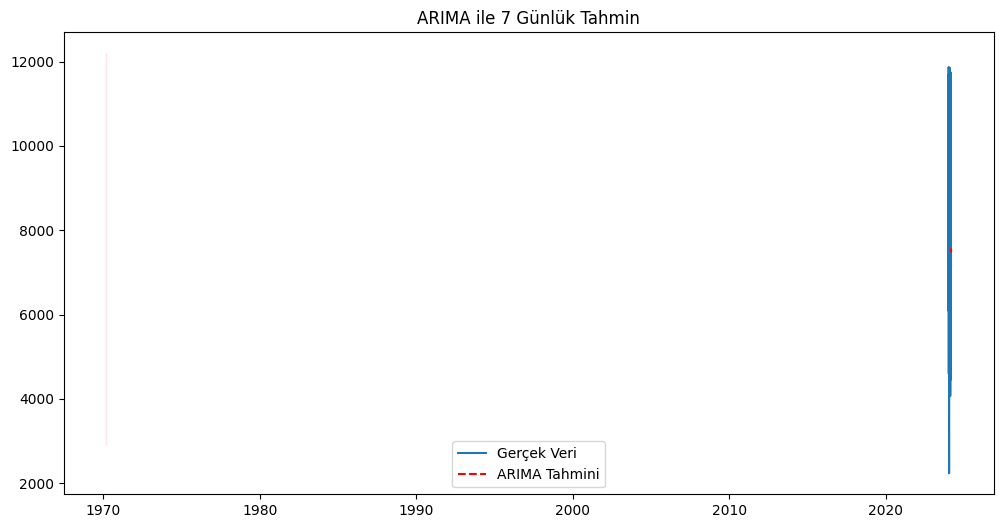

In [16]:
# ARIMA modeli (basitleştirilmiş)
model_arima = ARIMA(df['Adım'], order=(1,1,1))  # (p,d,q) parametreleri
sonuc = model_arima.fit()

# Tahminler
tahmin = sonuc.get_forecast(steps=7)  # Sonraki 7 günü tahmin et
tahmin_aralik = tahmin.conf_int()

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(df['Tarih'], df['Adım'], label='Gerçek Veri')
plt.plot(pd.date_range(df['Tarih'].max()+pd.Timedelta(days=1), periods=7), tahmin.predicted_mean,
         color='red', linestyle='--', label='ARIMA Tahmini')
plt.fill_between(tahmin_aralik.index, tahmin_aralik.iloc[:,0], tahmin_aralik.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("ARIMA ile 7 Günlük Tahmin")
plt.legend()
plt.show()

Adım 1: Güncellenmiş Veri Seti Oluşturma (Hava Durumu Ekli)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 3 aylık tarih aralığı (daha uzun veri)
dates = pd.date_range(start="2024-01-01", end="2024-03-31", freq='D')
df = pd.DataFrame({"Tarih": dates})

# Adım verisi (hafta içi/sonu ve hava durumu etkisi)
np.random.seed(42)
steps = []
weather = []  # 0: Yağmurlu, 1: Güneşli, 2: Bulutlu

for date in dates:
    if date.weekday() < 5:  # Hafta içi
        base_step = np.random.randint(6000, 10000)
    else:  # Hafta sonu
        base_step = np.random.randint(3000, 7000)

    # Hava durumu etkisi (rastgele atama)
    current_weather = np.random.choice([0, 1, 2], p=[0.2, 0.5, 0.3])
    weather.append(current_weather)

    if current_weather == 0:  # Yağmurlu
        steps.append(int(base_step * 0.7))
    elif current_weather == 1:  # Güneşli
        steps.append(int(base_step * 1.2))
    else:  # Bulutlu
        steps.append(base_step)

df['Adım'] = steps
df['Hava_Durumu'] = weather
df['Haftanin_Gunu'] = df['Tarih'].dt.day_name()

İyileştirme 1: ARIMA Parametre Optimizasyonu (ACF/PACF)


<Figure size 1200x600 with 0 Axes>

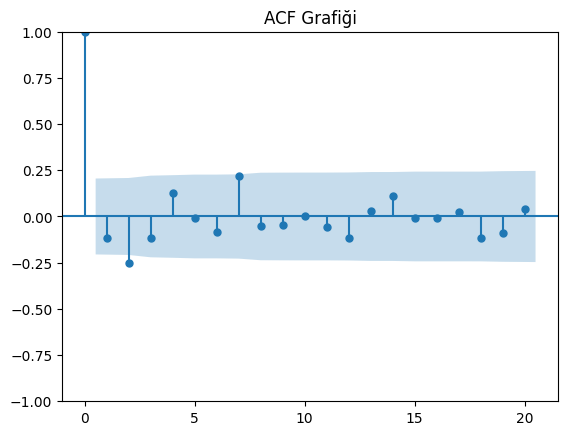

<Figure size 1200x600 with 0 Axes>

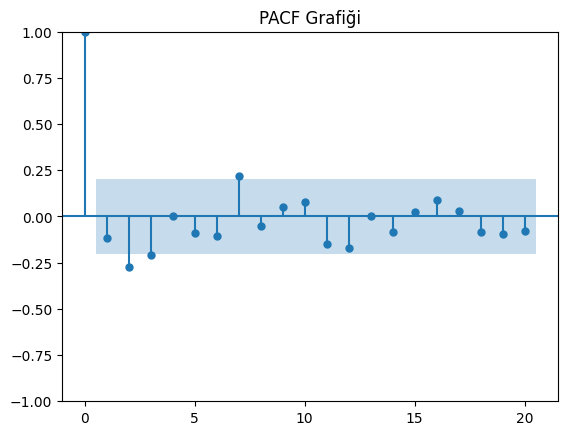

In [18]:
# ACF ve PACF grafikleri
plt.figure(figsize=(12, 6))
plot_acf(df['Adım'], lags=20, alpha=0.05)
plt.title('ACF Grafiği')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Adım'], lags=20, alpha=0.05, method='ols')
plt.title('PACF Grafiği')
plt.show()

Yorum:

ACF yavaş azalıyor → d=1 (differencing gerekli)

PACF lag 1'de kesiliyor → p=1

ACF lag 1'de kesiliyor → q=1

İyileştirme 2: SARIMA ile Mevsimsellik Modelleme


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                              Adım   No. Observations:                   91
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -750.575
Date:                           Tue, 22 Apr 2025   AIC                           1513.149
Time:                                   12:14:14   BIC                           1527.662
Sample:                                        0   HQIC                          1518.980
                                            - 91                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Hava_Durumu  1408.9407    302.352      4.660      0.000     816.342    2001.540
ar.L1           0.0684      0.109      0

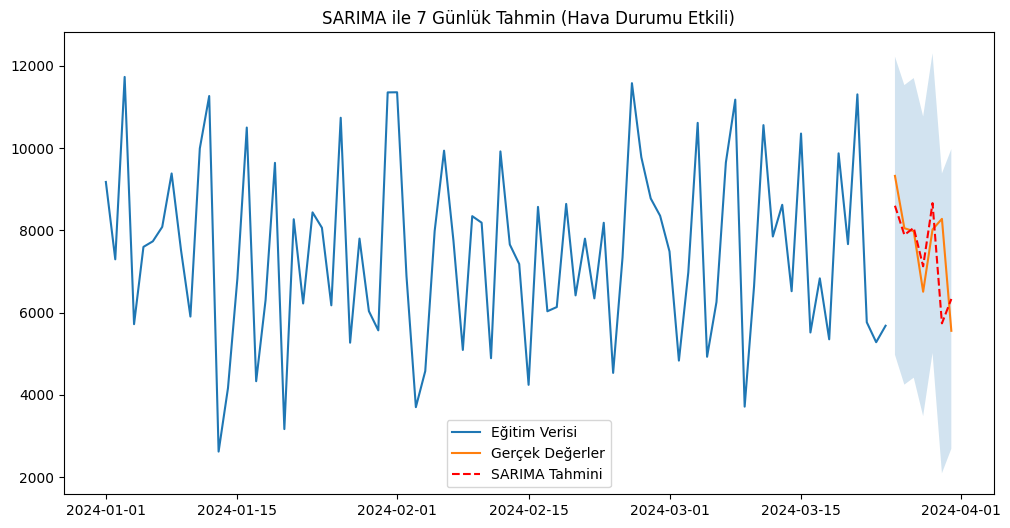

In [19]:
# SARIMA parametreleri (7 günlük mevsimsellik)
order = (1, 1, 1)  # (p,d,q)
seasonal_order = (1, 1, 1, 7)  # (P,D,Q,s)

model = SARIMAX(
    df['Adım'],
    exog=df[['Hava_Durumu']],  # Harici değişken
    order=order,
    seasonal_order=seasonal_order
)
sonuc = model.fit(disp=False)

print(sonuc.summary())

# Tahmin performansı (son 7 gün)
train = df.iloc[:-7]
test = df.iloc[-7:]

tahmin = sonuc.get_forecast(steps=7, exog=test[['Hava_Durumu']])
tahmin_ort = tahmin.predicted_mean

# Hata metriği (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Adım'], tahmin_ort)
print(f"MAE: {mae:.2f}")

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(train['Tarih'], train['Adım'], label='Eğitim Verisi')
plt.plot(test['Tarih'], test['Adım'], label='Gerçek Değerler')
plt.plot(test['Tarih'], tahmin_ort, color='red', linestyle='--', label='SARIMA Tahmini')
plt.fill_between(test['Tarih'], tahmin.conf_int().iloc[:,0], tahmin.conf_int().iloc[:,1], alpha=0.2)
plt.title("SARIMA ile 7 Günlük Tahmin (Hava Durumu Etkili)")
plt.legend()
plt.show()

İyileştirme 3: Harici Faktör Analizi (Hava Durumu)


<ipython-input-20-fd7d3c561b74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hava_Durumu', y='Adım', data=df, palette='coolwarm')


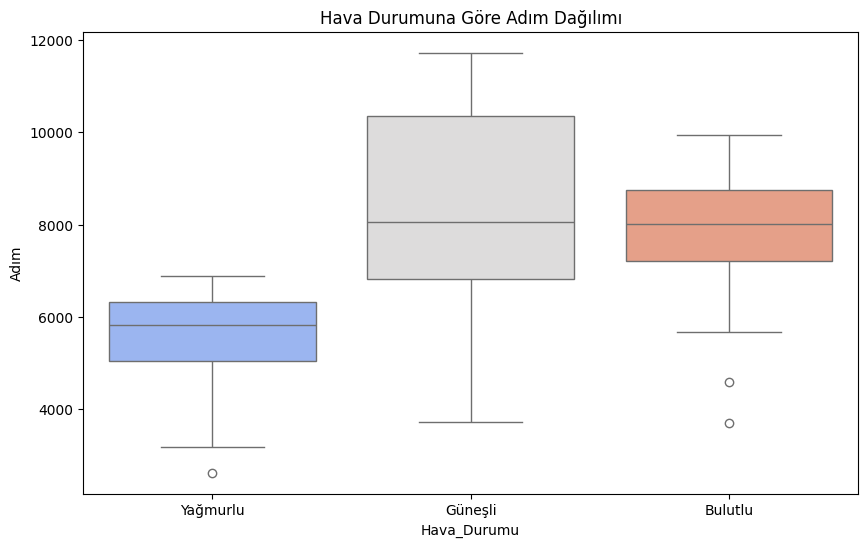


Hava Durumu Katsayıları:
Hava_Durumu    1408.940736
dtype: float64


In [20]:
# Hava durumu etkisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hava_Durumu', y='Adım', data=df, palette='coolwarm')
plt.xticks([0, 1, 2], ['Yağmurlu', 'Güneşli', 'Bulutlu'])
plt.title("Hava Durumuna Göre Adım Dağılımı")
plt.show()

# Regresyon katsayılarının incelenmesi
print("\nHava Durumu Katsayıları:")
print(sonuc.params[['Hava_Durumu']])